<p>Linear Regression with <b>L2 Regularization</b></p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def layer_size(X, Y):
    in_layer, out_layer = (X.shape[0], Y.shape[0])
    
    return in_layer, out_layer

In [3]:
def param_init(in_layer, out_layer, beta):
    
    W = np.random.randn(out_layer, in_layer) * beta
    b = - np.ones((out_layer, 1))
    
    params = {
        "W": W,
        "b": b
    }
    return params

In [4]:
def forward_propagation(X, W, b):
    Z = np.matmul(W, X) + b
    return Z

In [5]:
def compute_cost(Y, Z, W, lam):
    
    m = Y.shape[1]
    reg = (lam / (2 * m)) * np.sum(np.power(W, 2))
    cost = np.sum(np.power(Z - Y, 2)) / (2 * m)
    cost = cost + reg
    
    return cost

In [6]:
def back_propagation(X, Y, Z, W, b, lam):
    
    m = X.shape[1]
    dZ = Z - Y
    dW = (np.matmul(dZ, X.T) + (lam * W)) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    
    grads = {
        "dW": dW,
        "db": db
    }
    return grads   

In [7]:
def update_params(W, b, dW, db, alpha):
    
    W -= alpha * dW
    b -= alpha * db
    
    params = {
        "W": W,
        "b": b
    }
    
    return params

In [8]:
def train(X, Y, alpha=1e-2, beta=1e-2, lam=1, num_iter=200, n=20):
    """Y.shape = (m, n), X.shape = (m, num_ws)"""
    
    cost_ = []
    params_ = []
    
    X = np.transpose(X)
    Y = np.transpose(Y)
    
    in_layer, out_layer = layer_size(X, Y)
    params = param_init(in_layer, out_layer, beta)
    
    for i in range(num_iter):
        
        Z = forward_propagation(X, params["W"], params["b"])
        cost = compute_cost(Y, Z, params["W"], lam)
        grads = back_propagation(X, Y, Z, params["W"], params["b"], lam)
        params = update_params(params["W"], params["b"], grads["dW"], grads["db"], alpha)
        cost_.append(cost)
        params_.append(params)
        
        if i % n == 0:
            print(f"Iter {i}: {cost}")
            
    return params, cost_

In [9]:
def predict(X, params):
    W = params["W"]
    b = params["b"]
    y_hat = np.dot(W, X) + b
    return y_hat.flatten()

In [69]:
x = np.arange(0, 20, 1)
y = 1 + x**2
print(x.shape)
print(y.shape)
X = x.reshape((20, 1))
Y = y.reshape((20, 1))
print(X.shape)
print(Y.shape)

(20,)
(20,)
(20, 1)
(20, 1)


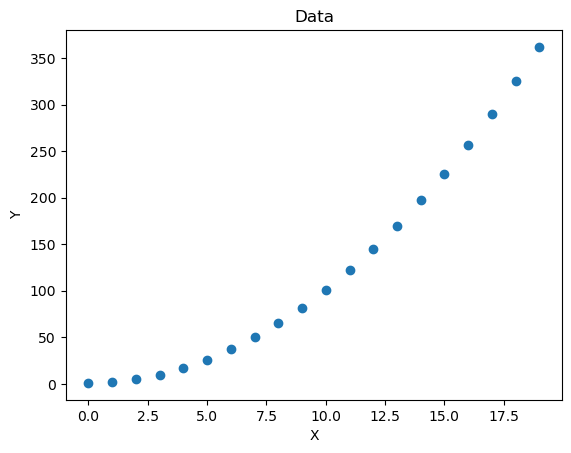

In [70]:
plt.scatter(x, y)
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [71]:
params, cost_ = train(X, Y, alpha=1e-2, beta=1e-2, lam=1, num_iter=200, n=20)
print(params)

Iter 0: 14212.513523115565
Iter 20: 839.1974487730813
Iter 40: 799.3796871316385
Iter 60: 763.6138316224043
Iter 80: 731.4875551172977
Iter 100: 702.6304894218858
Iter 120: 676.7099554808631
Iter 140: 653.4271280832547
Iter 160: 632.5135908521067
Iter 180: 613.728241802809
{'W': array([[16.40967078]]), 'b': array([[-22.48434015]])}


In [72]:
y_hat = predict(X.reshape((1, 20)), {'W': 16.40967078, 'b':-22.48434015})

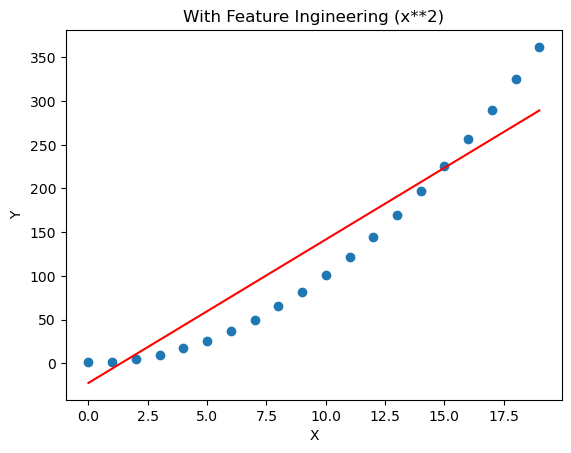

In [73]:
plt.scatter(X, Y)
plt.plot(X, y_hat, color="red")
plt.title("With Feature Ingineering (x**2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [83]:
x = np.arange(0, 20, 1)
y = x**2
Y = y.reshape((20, 1))
X = np.c_[x, x**2, x**3] 
print(y)
print(X)
print(X.shape)
print(Y.shape)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]
[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]
(20, 3)
(20, 1)


In [84]:
params, cost_ = train(X, Y, alpha=1e-7, beta=1e-2, lam=1, num_iter=10000, n=500)
print(params)

Iter 0: 15539.433368438564
Iter 500: 356.02801850450743
Iter 1000: 328.93719317528587
Iter 1500: 303.90798169876194
Iter 2000: 280.7834950938743
Iter 2500: 259.4187836437204
Iter 3000: 239.67992831658913
Iter 3500: 221.44320132992186
Iter 4000: 204.59429059543032
Iter 4500: 189.02758318399844
Iter 5000: 174.64550331896498
Iter 5500: 161.35790074817191
Iter 6000: 149.0814856609477
Iter 6500: 137.73930660795622
Iter 7000: 127.26026815138528
Iter 7500: 117.578685221995
Iter 8000: 108.63387138963235
Iter 8500: 100.36975846639116
Iter 9000: 92.73454505800441
Iter 9500: 85.68037186050213
{'W': array([[0.07629615, 0.53621039, 0.02750332]]), 'b': array([[0.01057107]])}


In [85]:
y_hat = predict(X.reshape((3, 20)), 
                {'W': np.array([[0.07629615, 0.53621039, 0.02750332]]), 'b':0.01057107})
print(y_hat)

[120.48007639  64.18883784  26.66992666 189.39768171  79.84566042
  34.81688198 280.89113005  97.96535418  44.49403498 398.17768375
 118.71293904  56.15916256 544.47460515 142.25343492  70.27004162
 722.99915659 168.75186174  87.28444906 936.96860041 198.37323942]


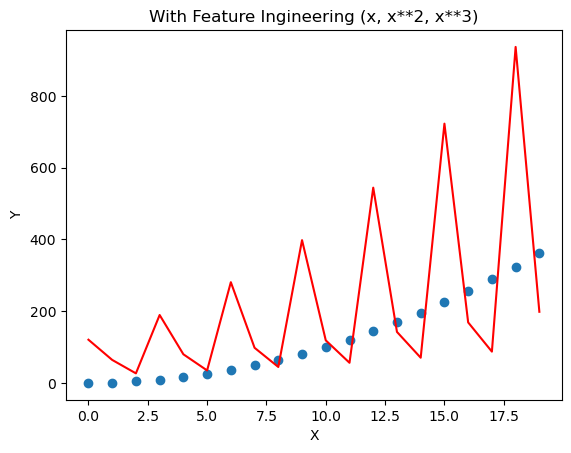

In [87]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.title("With Feature Ingineering (x, x**2, x**3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [102]:
params, cost_ = train(X, Y, alpha=1e-7, beta=1e-2, lam=100, num_iter=1000000, n=50000)
print(params)

Iter 0: 17750.095212309643
Iter 50000: 2.573690456989288
Iter 100000: 2.441240415559191
Iter 150000: 2.4409398902631487
Iter 200000: 2.440700290695744
Iter 250000: 2.440474805781108
Iter 300000: 2.440262568632753
Iter 350000: 2.4400627797214747
Iter 400000: 2.439874687826583
Iter 450000: 2.4396975871120326
Iter 500000: 2.439530814384433
Iter 550000: 2.4393737465166785
Iter 600000: 2.439225798027268
Iter 650000: 2.439086418805872
Iter 700000: 2.43895509197631
Iter 750000: 2.4388313318886317
Iter 800000: 2.438714682232525
Iter 850000: 2.438604714264714
Iter 900000: 2.4385010251434145
Iter 950000: 2.4384032363634627
{'W': array([[0.14011522, 0.9716789 , 0.00117448]]), 'b': array([[0.02133337]])}


In [103]:
y_hat = predict(X.reshape((3, 20)), 
                {'W': np.array([[0.14011522, 0.9716789 , 0.00117448]]), 'b':0.02133337})
print(y_hat)

[ 210.10246289    9.40341823   47.65004219  333.67750937   11.15765291
   62.36651539  498.06541861   13.29077435   79.86703771  709.09626401
   15.80982943  100.99230047  972.60011897   18.72186503  126.58299499
 1294.40705689   22.03392803  157.47981259 1680.34715117   25.75306531]


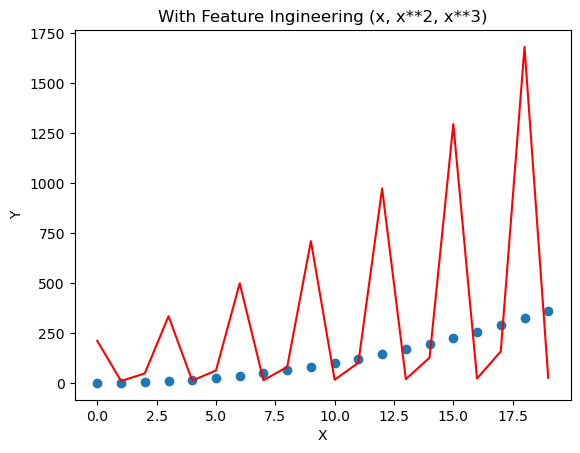

In [104]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.title("With Feature Ingineering (x, x**2, x**3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [128]:
x = np.arange(0, 20, 1)
y = x**2
Y = y.reshape((20, 1))
x_norm = (x - np.mean(x)) / np.std(x)
y_norm = (Y - np.mean(Y)) / np.std(Y)

X = np.c_[x_norm, x_norm**2, x_norm**3] 
print(X)

[[-1.64750894e+00  2.71428571e+00 -4.47180999e+00]
 [-1.47408695e+00  2.17293233e+00 -3.20309119e+00]
 [-1.30066495e+00  1.69172932e+00 -2.20037304e+00]
 [-1.12724296e+00  1.27067669e+00 -1.43236136e+00]
 [-9.53820966e-01  9.09774436e-01 -8.67761932e-01]
 [-7.80398973e-01  6.09022556e-01 -4.75280577e-01]
 [-6.06976979e-01  3.68421053e-01 -2.23623097e-01]
 [-4.33554985e-01  1.87969925e-01 -8.14952979e-02]
 [-2.60132991e-01  6.76691729e-02 -1.76029843e-02]
 [-8.67109970e-02  7.51879699e-03 -6.51962383e-04]
 [ 8.67109970e-02  7.51879699e-03  6.51962383e-04]
 [ 2.60132991e-01  6.76691729e-02  1.76029843e-02]
 [ 4.33554985e-01  1.87969925e-01  8.14952979e-02]
 [ 6.06976979e-01  3.68421053e-01  2.23623097e-01]
 [ 7.80398973e-01  6.09022556e-01  4.75280577e-01]
 [ 9.53820966e-01  9.09774436e-01  8.67761932e-01]
 [ 1.12724296e+00  1.27067669e+00  1.43236136e+00]
 [ 1.30066495e+00  1.69172932e+00  2.20037304e+00]
 [ 1.47408695e+00  2.17293233e+00  3.20309119e+00]
 [ 1.64750894e+00  2.71428571e+

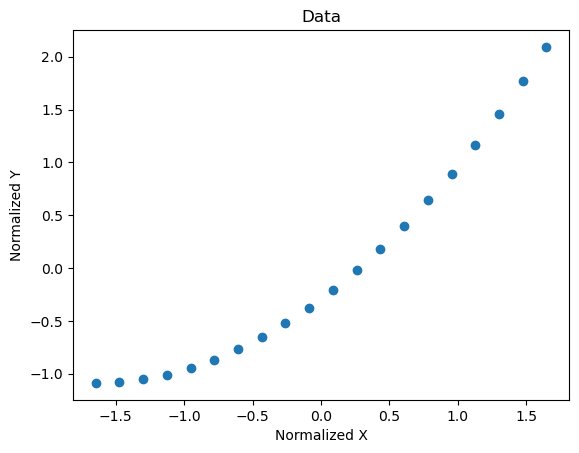

In [129]:
plt.scatter(x_norm, y_norm)
plt.title("Data")
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.show()

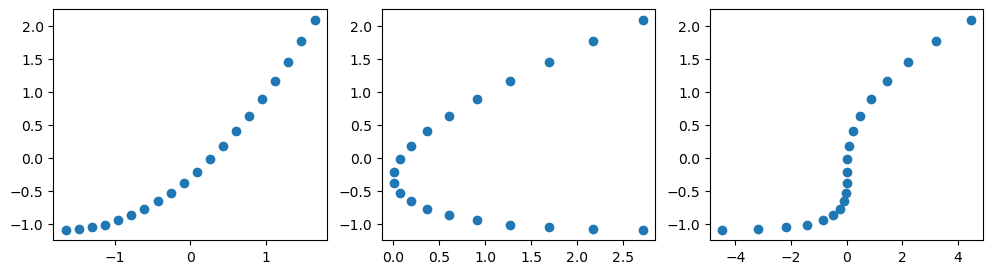

In [130]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], y_norm)
plt.subplot(1, 3, 2)
plt.scatter(X[:, 1], y_norm)
plt.subplot(1, 3, 3)
plt.scatter(X[:, 2], y_norm)
plt.show()

In [169]:
params, cost_ = train(X, y_norm, alpha=1e-1, beta=1e-2, lam=100, num_iter=1000000, n=50000)
print(params)

Iter 0: 0.9759842762769247
Iter 50000: 0.2919440497870234
Iter 100000: 0.2919440497870234
Iter 150000: 0.2919440497870234
Iter 200000: 0.2919440497870234
Iter 250000: 0.2919440497870234
Iter 300000: 0.2919440497870234
Iter 350000: 0.2919440497870234
Iter 400000: 0.2919440497870234
Iter 450000: 0.2919440497870234
Iter 500000: 0.2919440497870234
Iter 550000: 0.2919440497870234
Iter 600000: 0.2919440497870234
Iter 650000: 0.2919440497870234
Iter 700000: 0.2919440497870234
Iter 750000: 0.2919440497870234
Iter 800000: 0.2919440497870234
Iter 850000: 0.2919440497870234
Iter 900000: 0.2919440497870234
Iter 950000: 0.2919440497870234
{'W': array([[0.10878818, 0.0401468 , 0.17424698]]), 'b': array([[-0.0401468]])}


In [170]:
y_hat = predict(X.reshape((3, 20)), 
                {'W': np.array([[0.10878818, 0.0401468 , 0.17424698]]), 'b':-0.0401468})
print(y_hat)

[-0.1641578   0.27669521 -0.38309831 -0.09766147  0.26861525 -0.21968814
 -0.02382503  0.29161708 -0.08280084  0.05860789  0.35115361  0.03096801
  0.15089365  0.45267777  0.12502286  0.25428862  0.60164247  0.20276814
  0.37004914  0.80350062]


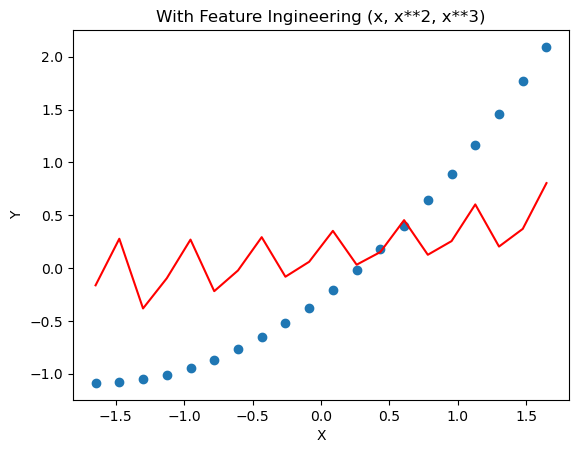

In [171]:
plt.scatter(x_norm, y_norm)
plt.plot(x_norm, y_hat, color="red")
plt.title("With Feature Ingineering (x, x**2, x**3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()